In [1]:
from seisray.core.earth_models import EarthModelManager
from seisray.core.ray_paths import RayPathTracer
from seisray.visualization.earth_plots import EarthPlotter
from seisray.visualization.earth_3d import Earth3DVisualizer
import matplotlib.pyplot as plt
import pyvista as pv
pv.set_jupyter_backend('trame')  # Interactive backend for Jupyter

### Plotting the 1D Earth model

You can visualize the 1D profiles (e.g., Vp and Vs vs. depth) for any TauP model using `EarthModelManager.plot_1d_profile()`. The example below plots Vp and Vs for `iasp91` down to 700 km depth.

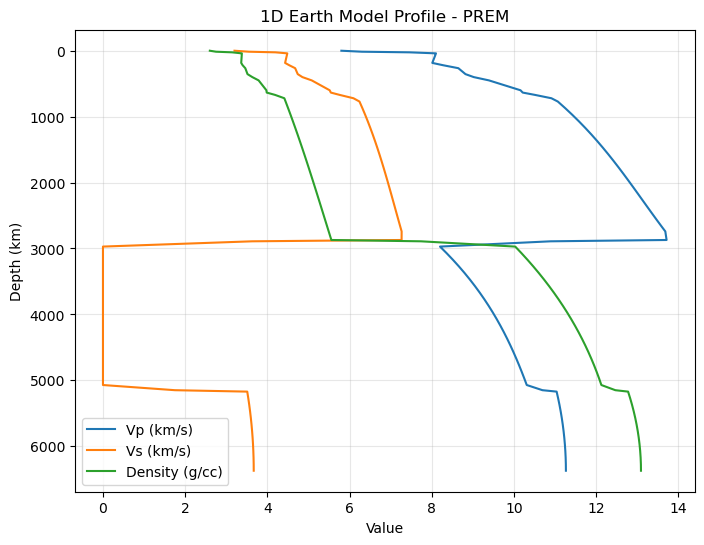

In [3]:
# Visualize 1D Earth model profiles (Vp, Vs) for iasp91
emm = EarthModelManager()
emm.plot_1d_profile('prem', properties=['vp','vs', 'rho'], max_depth_km=6371)
plt.show()

In [5]:
# Example: Geographic coordinates (Realistic seismic scenario)
source_lat, source_lon = 0, 0       # Source at equator, 0° longitude
source_depth_km = 10.0               # 10 km depth
receiver_lat, receiver_lon = 0, 60  # 60 degrees away

tracer = RayPathTracer(model_name='prem')

# Get ray paths using geographic coordinates (returns tuple: ray_paths, geo_info)
ray_paths, geo_info = tracer.get_ray_paths(
    source_lat=source_lat,
    source_lon=source_lon,
    source_depth=source_depth_km,
    receiver_lat=receiver_lat,
    receiver_lon=receiver_lon,
    phases=['P']   # P phase
)

print(f"📏 Distance: {geo_info['distance_deg']:.1f}° ({geo_info['distance_km']:.0f}km)")
print(f"📐 Azimuth: {geo_info['azimuth']:.1f}°")
print(f"🌊 Ray paths found: {len(ray_paths)}")

if ray_paths:
    ray = ray_paths[0]
    print(f"⏱️  Travel time: {ray.time:.1f} seconds")
    print(f"🎯 Phase: {ray.name}")
    print(f"📊 Ray path points: {len(ray.path['depth'])}")
    print(f"🏔️  Maximum depth: {max(ray.path['depth']):.1f} km")

📏 Distance: 60.0° (6679km)
📐 Azimuth: 90.0°
🌊 Ray paths found: 1
⏱️  Travel time: 605.5 seconds
🎯 Phase: P
📊 Ray path points: 272
🏔️  Maximum depth: 1554.3 km


/home/users/scro4564/anaconda3/envs/masters/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


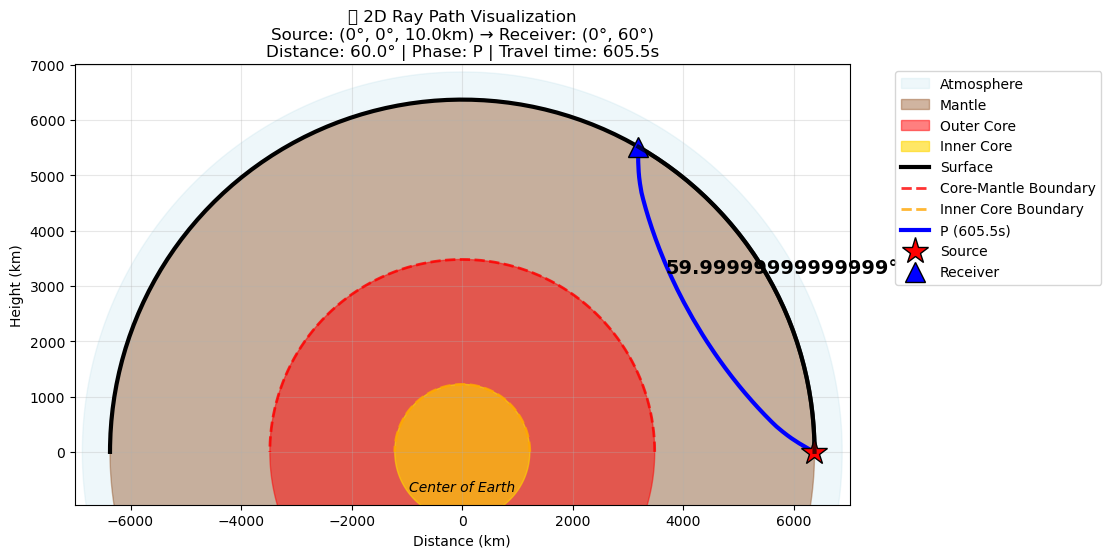

✅ 2D visualization complete!


In [6]:
# Create 2D plotter
plotter = EarthPlotter()

# Plot the ray paths using seisray's built-in method
if ray_paths:
    # Extract ray coordinates for plotting
    ray_coordinates = tracer.extract_ray_coordinates(ray_paths)

    # Create the circular Earth plot
    fig = plotter.plot_circular_earth(
        ray_coordinates=ray_coordinates,
        source_depth=source_depth_km,
        distance_deg=geo_info['distance_deg'],
        fig_size=(10, 10)
    )

    plt.title(f"🌍 2D Ray Path Visualization\n"
              f"Source: ({source_lat}°, {source_lon}°, {source_depth_km}km) → "
              f"Receiver: ({receiver_lat}°, {receiver_lon}°)\n"
              f"Distance: {geo_info['distance_deg']:.1f}° | Phase: {ray_paths[0].name} | "
              f"Travel time: {ray_paths[0].time:.1f}s")

    plt.show()

    print(f"✅ 2D visualization complete!")
else:
    print(f"⚠️  No ray paths to visualize")

## 🌍 3D Interactive Earth Visualization

Now let's create **interactive 3D visualizations** of Earth and seismic ray paths using geographic coordinates! This system is designed to be extensible for:

- **Ray paths** in true 3D geographic space
- **Meshes** (your future work) 
- **Interior structure** (velocity, density)
- **Interactive exploration**

For this we'll use **PyVista** - a powerful Python 3D visualization library built on VTK that's perfect for scientific applications.

In [ ]:
# Create new visualizer instance
viz3d = Earth3DVisualizer()

# Get ray paths with geographic coordinates for 3D visualization
ray_paths_geo_3d, info_3d = tracer.get_ray_paths(
    source_lat=source_lat, source_lon=source_lon, source_depth=source_depth_km,
    receiver_lat=receiver_lat, receiver_lon=receiver_lon,
    phases=['P'], output_geographic=True
)

# Convert geographic ray paths to 3D coordinates
ray_paths_3d = viz3d.convert_geographic_ray_paths_to_3d(ray_paths_geo_3d)

print(f"✅ Converted to 3D: {len(ray_paths_3d)} ray paths")
for phase, coords_3d in ray_paths_3d.items():
    print(f"   {phase}: {len(coords_3d['x'])} 3D points")
    print(f"   Travel time: {coords_3d['travel_time']:.1f}s")

🔄 Using same coordinates as 2D visualization:
   Source: 0°, 0°, 10.0km depth
   Receiver: 0°, 60°
   Ray path: P - 605.5s
✅ Converted to 3D: 1 ray paths
   P: 272 3D points
   Travel time: 605.5s


In [9]:
plotter = viz3d.plot_3d_earth_and_rays(
       ray_paths_3d, source_lat, source_lon, source_depth_km,
       receiver_lat, receiver_lon, show_earth=True
   )
plotter.show()  # Opens interactive 3D window

Widget(value='<iframe src="http://localhost:41107/index.html?ui=P_0x7fc3206ac510_1&reconnect=auto" class="pyvi…

In [11]:
# Reload the module to get the updated method signature
import importlib
import seisray.visualization.earth_3d
importlib.reload(seisray.visualization.earth_3d)
from seisray.visualization.earth_3d import Earth3DVisualizer

# Test the improved 3D plotter - now accepts geographic ray paths directly!
# No need to manually convert to 3D coordinates

print("Testing the improved 3D plotter with geographic ray paths:")
print("Available phases in ray_paths_geo_3d:", [arr.name for arr in ray_paths_geo_3d])

# Create a new visualizer and plot directly with geographic ray paths
viz3d_improved = Earth3DVisualizer()
plotter_improved = viz3d_improved.plot_3d_earth_and_rays(
    ray_paths=ray_paths_geo_3d,  # Pass geographic ray paths directly!
    source_lat=source_lat,
    source_lon=source_lon,
    source_depth=source_depth_km,
    receiver_lat=receiver_lat,
    receiver_lon=receiver_lon,
    notebook=True
)

print("Success! The 3D plotter now handles coordinate conversion internally.")

Testing the improved 3D plotter with geographic ray paths:
Available phases in ray_paths_geo_3d: ['P']
Success! The 3D plotter now handles coordinate conversion internally.


In [12]:
# Test backward compatibility - the improved plotter should also work with 3D coordinates
print("Testing backward compatibility with 3D coordinate format:")

# The old 3D coordinates should still work
plotter_backward_compat = viz3d_improved.plot_3d_earth_and_rays(
    ray_paths=ray_paths_3d,  # Pass 3D coordinates (old format)
    source_lat=source_lat,
    source_lon=source_lon,
    source_depth=source_depth_km,
    receiver_lat=receiver_lat,
    receiver_lon=receiver_lon,
    notebook=True
)

print("Success! Backward compatibility maintained - both input formats work!")

Testing backward compatibility with 3D coordinate format:
Success! Backward compatibility maintained - both input formats work!


## 🎉 Improved 3D Visualization - User-Friendly Interface

The `plot_3d_earth_and_rays` method now provides a user-friendly interface that accepts **both** input formats:

1. **Geographic ray paths** (ObsPy format) - **NEW!** ✨
   - Just pass the output from `get_ray_paths()` directly
   - The method handles coordinate conversion internally
   - No manual conversion needed!

2. **3D coordinates** (dictionary format) - **Maintained for backward compatibility**
   - The old format still works
   - For users who need fine control over coordinates

### Key Benefits:
- **Simplified workflow**: No need to manually convert geographic points to 3D
- **Backward compatible**: Existing code continues to work
- **Flexible**: Supports both coordinate systems seamlessly
- **Robust**: Automatic type detection and appropriate handling

This makes 3D seismic ray visualization much more accessible and user-friendly! 🌍